# Regressão Linear - Projeto

Parabéns! Você conseguiu um contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo mobile ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em aplicativos móveis ou em seu site. Eles contrataram você para ajudá-los a descobrir isso! Vamos começar!

Basta seguir as etapas abaixo para analisar os dados do cliente (é falso, não se preocupe, eu não lhe dei números reais de cartões de crédito ou e-mails).

## Imports
** Importe pandas, numpy, matplotlib,e seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Leia no arquivo csv do Ecommerce Customers como um DataFrame chamado clientes. **

In [ ]:
clientes = pd.read_csv("/content/ecommerce-customers.csv")

**Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe().**

In [ ]:
clientes.info()

clientes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Análise de dados exploratória

** Vamos explorar os dados! **

Pelo resto do exercício, só estaremos usando os dados numéricos do arquivo csv.
___
** Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido? **

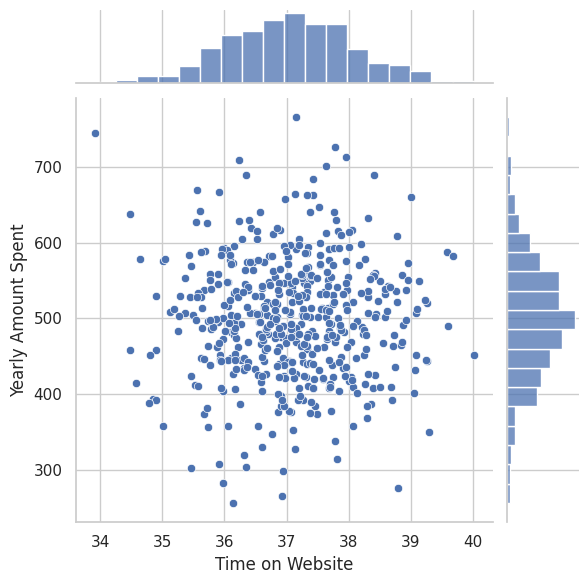

In [ ]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

### A correlação faz pouco sentido, visto que os dados estão completamente dispersos e organizados de forma não linear.

** Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App), em vez disso. **

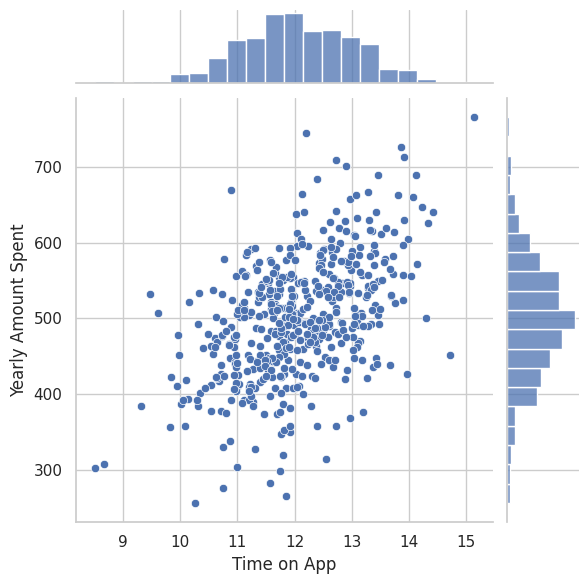

In [ ]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

### Desta vez, os dados se organizaram de forma linear, mostrando considerável correlação.

** Use jointplot criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership). **

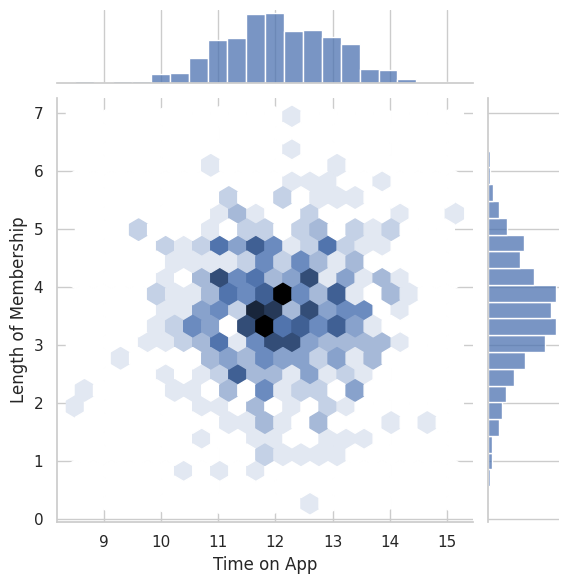

In [ ]:
sns.jointplot(x='Time on App', y='Length of Membership', kind='hex', data=clientes)

**Vamos explorar esses tipos de relações em todo o conjunto de dados. Use [parplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o gráfico abaixo. (Não se preocupe com as cores)***

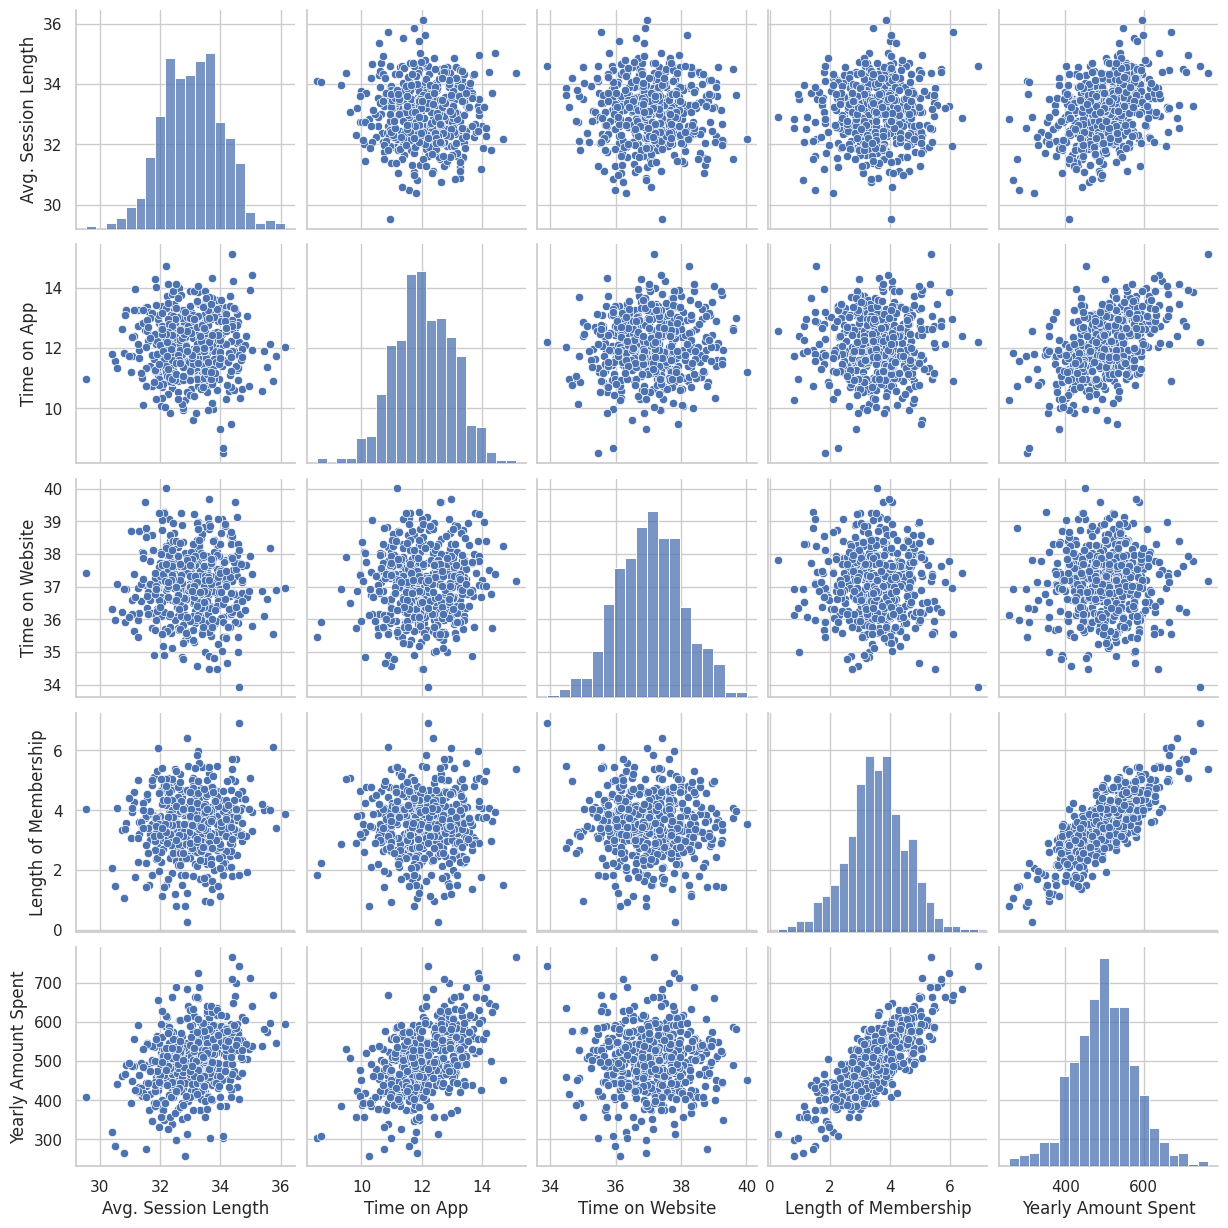

In [ ]:
sns.pairplot(clientes, height=2.5)

Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent)?

In [ ]:
# Lenght of Membership

Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership).

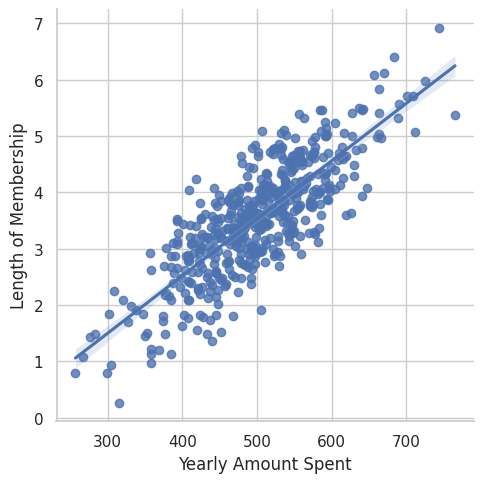

In [ ]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership',data=clientes)

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.
Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent).

In [ ]:
X = clientes[['Avg. Session Length','Time on App', 'Time on Website','Length of Membership']]
y = clientes['Yearly Amount Spent']

Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

Importe LinearRegression do sklearn.linear_model

In [ ]:
from sklearn.linear_model import LinearRegression

Crie uma instância de um modelo LinearRegression () chamado lm.

In [ ]:
lm=LinearRegression()

Treine lm nos dados de treinamento.

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

**Print os coeficientes do modelo**

In [ ]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

Use lm.predict () para prever o conjunto X_test dos dados.

In [ ]:
prev= lm.predict(X_test)

Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.

Text(0, 0.5, 'Valor Previsto')

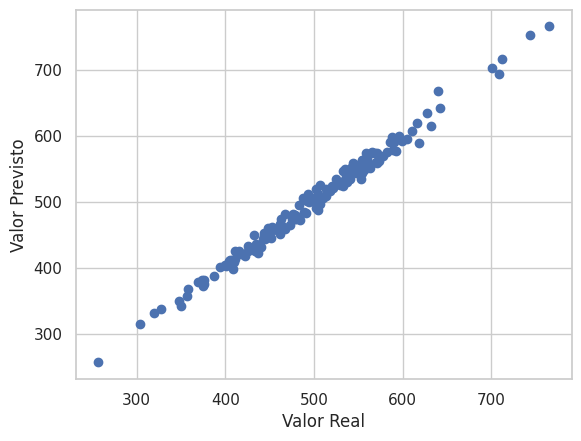

In [ ]:
plt.scatter(y_test,prev)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas.

In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print('Erro médio absoluto',mean_absolute_error(y_test,prev))
print('Erro quadrado médio da raiz',root_mean_squared_error(y_test,prev))
print('Erro quadrado médio', mean_squared_error(y_test,prev))

Erro médio absoluto 7.228148653430826
Erro quadrado médio da raiz 8.933815066978624
Erro quadrado médio 79.81305165097427


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist ().

Text(0.5, 1.0, 'Análise de resíduos')

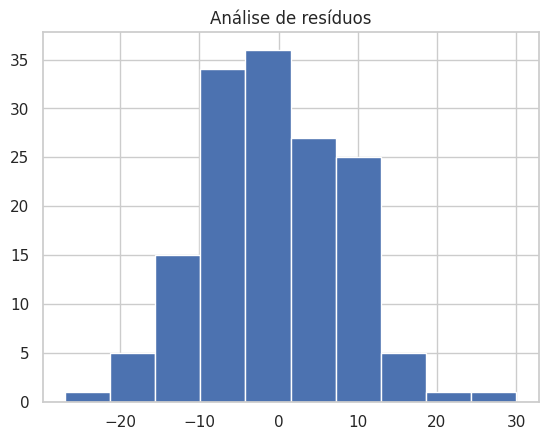

In [ ]:
plt.hist(y_test-prev)
plt.title('Análise de resíduos')

<ipython-input-94-c707e2cb15e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prev)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

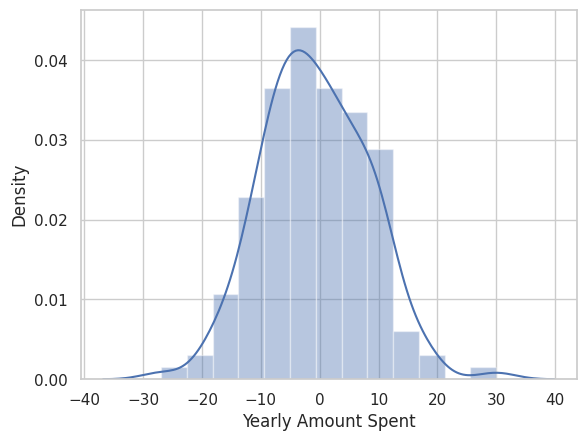

In [ ]:
sns.distplot(y_test-prev)

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

Recrie o quadro de dados abaixo.

In [ ]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

**Como você pode interpretar esses coeficientes?**

### Os coeficiente do tempo no aplicativo é considerável, demonstrando que a empresa deve demandar mais atenção para essa variável, que, mesmo assim, ainda é muito menor se comparada ao tempo de adesão, que possui um altíssimo coeficiente, reforçando a linearidade do gráfico para o resultado final.
### A duração média da sessão e o tempo no site demonstraram um coeficiente muito baixo, reforçando que o tempo no aplicativo induz muito mais na compra final do que o site e que a empresa pouco precisa se preocupar com o tempo da sessão.

**Você acha que a empresa deve se concentrar mais em seu aplicativo móvel ou em seu site?**

### A empresa deve, no curto prazo, a fim de gerar lucro, sem nenhuma dúvida, investir mais no aplicativo móvel do que no seu site. Isso se comprova no alto coeficiente e alta linearidade do gráfico daquele, situação completamente contrária no caso do site.
### Entretanto, se analisarmos no longo prazo, reconhecendo o fato de que muitas pessoas optam pela compra pelo site, investir no site e em que o tempo neste gere lucro, visto que ele gera muito pouca compra. O que provavelmente acontece é que o tempo no aplicativo, que é muito mais interessante ao comprador, faz com que ele compre mais do que um produto várias vezes. Do contrário, na página da web, esse tempo é cansativo e o cliente faz apenas a sua compra e sai da página.
### No mais, o tempo de adesão é a variável mais importante de todas, tendo um coeficiente maior do que o tempo no aplicativo e na página da internet somados, e a empresa deve investir o máximo de atenção possível na questão de manter os clientes por mais tempo.